<a href="https://colab.research.google.com/github/GVSLALITHA/Projects/blob/main/FishClassificationModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Fish Classification -A multiclass classification problem

### Importing necessary libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

***ImageDataGenerator:***

* Image augmentation is a technique of applying different transformations to original images. These help incorporate a level of variation in the dataset which allows your model to generalize better on unseen data. Also, the model becomes more robust when it is trained on new, slightly altered images.

* ImageDataGenerator class provides a quick and easy way to augment your images. It provides a host of different augmentation techniques like standardization, rotation, shifts, flips, brightness change etc.

* It enables configure random transformations and normalization operations to be done on your image data during training, instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory).

* These generators can then be used with the Keras model methods that accept data generators as inputs, fit_generator, evaluate_generator and predict_generator.


* Here we use flow_from_directory() method allows you to read the images directly from the directory and augment them while the neural network model is learning on the training data.

* The method expects that images belonging to different classes are present in different folders but are inside the same parent folder.

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,

                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory('FishDataset/train',
                                                target_size=(128, 128),
                                               batch_size=32,
                                                class_mode='categorical')

test_data = test_datagen.flow_from_directory('FishDataset/test',
                                              target_size=(128, 128),
                                              batch_size=32,
                                              class_mode='categorical', shuffle =False)

val_data = test_datagen.flow_from_directory('FishDataset/val',
                                             target_size=(128, 128),
                                             batch_size=32,
                                             class_mode='categorical', shuffle=False)

Found 0 images belonging to 11 classes.
Found 20 images belonging to 11 classes.


### Printing sample images

animal fish


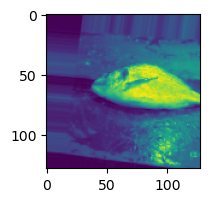

animal fish


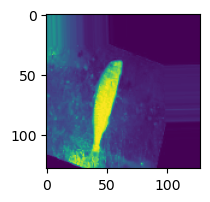

animal fish


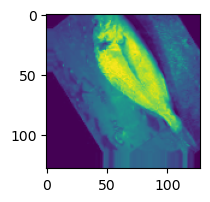

animal fish


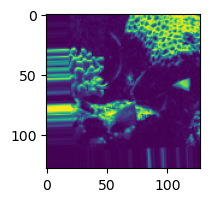

In [ ]:
import matplotlib.pyplot as plt
import os
n = 4
x,y = train_data.next()
for i in range(0,n):
    plt.figure(figsize=(2, 2))
    image_x = x[i,:,:,0]
    image_label = os.path.dirname(train_data.filenames[i]) # only OK if shuffle=false
    print(image_label)
    plt.imshow(image_x)

    plt.show()

### Define Architecture

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(11, activation='softmax'))



### Compile the model

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

### Fit the model

In [ ]:
history = model.fit(train_data,
                    epochs=20,
                    validation_data=val_data)

Epoch 1/20
195/195 [==============================] - 129s 656ms/step - loss: 1.9906 - accuracy: 0.2810 - val_loss: 1.4424 - val_accuracy: 0.4744
Epoch 2/20
195/195 [==============================] - 97s 495ms/step - loss: 1.3304 - accuracy: 0.5039 - val_loss: 0.9843 - val_accuracy: 0.6429
Epoch 3/20
195/195 [==============================] - 103s 525ms/step - loss: 1.0160 - accuracy: 0.6283 - val_loss: 0.6807 - val_accuracy: 0.7637
Epoch 4/20
195/195 [==============================] - 106s 542ms/step - loss: 0.7993 - accuracy: 0.7134 - val_loss: 0.4976 - val_accuracy: 0.8269
Epoch 5/20
195/195 [==============================] - 104s 534ms/step - loss: 0.6075 - accuracy: 0.7854 - val_loss: 0.6259 - val_accuracy: 0.7802
Epoch 6/20
195/195 [==============================] - 102s 524ms/step - loss: 0.5569 - accuracy: 0.8087 - val_loss: 0.2461 - val_accuracy: 0.9075
Epoch 7/20
195/195 [==============================] - 103s 525ms/step - loss: 0.4460 - accuracy: 0.8496 - val_loss: 0.2406 - 

### Plot loss and accuracy curves for the model

In [ ]:
def plot_loss_accuracy(Model):
    import matplotlib.pyplot as plt

    plt.plot(Model.history['loss'], label='train loss')
    plt.plot(Model.history['val_loss'], label='val loss')
    plt.legend()
    plt.show()

# accuracies
    plt.plot(Model.history['accuracy'], label='train acc')
    plt.plot(Model.history['val_accuracy'], label='val acc')
    plt.legend()
    plt.show()

In [ ]:
plot_loss_accuracy(history)

In [ ]:
def generate_predictions(test_generator, ML_Model):
    yp = []

    for i in range(len(test_data)):

        x_batch, y_batch = next(test_data)
        y_test = test_generator.classes

        predicted_batch = model.predict(x_batch)

        yp.extend(np.argmax(predicted_batch, axis=1))

    return yp, y_test


### Generate confusion matrix for the model

In [ ]:
y_p, y_test =generate_predictions(test_data, model)

In [ ]:
def get_classes(path):
    import glob
    import os
    dirs = [name for name in glob.glob(path +'*') if os.path.isdir(name)]
    class_name =[]
    for directory in dirs:
        name = str(directory)

        class_name.append(name.split("\\")[1])
    return class_name

In [ ]:
path = "FishDataset/Train/"

In [ ]:
class_labels = get_classes(path)

In [ ]:
class_labels

In [ ]:
def print_confusion_Matrix(classes,Y_test, Y_p, model_name):
    from sklearn.metrics import confusion_matrix, classification_report

    conf_matrix = confusion_matrix(Y_test, Y_p)
    class_names = classes
    import matplotlib.pyplot as plt
    import seaborn as sns

    fig = plt.figure(figsize=(20, 20))
    ax= plt.subplot()
    sns.heatmap(conf_matrix, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells

    ax.set_xlabel('Predicted class', fontsize=20)
    ax.xaxis.set_label_position('bottom')
    plt.xticks(rotation=90)
    ax.xaxis.set_ticklabels(class_names, fontsize = 15)
    ax.xaxis.tick_bottom()

    ax.set_ylabel('Actual class', fontsize=20)
    ax.yaxis.set_ticklabels(class_names, fontsize = 15)
    plt.yticks(rotation=0)
    plt.title('Confusion Matrix: ' + model_name, fontsize=20)


    #plt.savefig('ConMat24.png')
    plt.show()
    print("CLASSIFICATION REPORT")
    print(".....................")
    print(classification_report(Y_test, Y_p, target_names = class_names))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Print performance results

In [ ]:
print_confusion_Matrix(class_labels, y_test, y_p, 'Base Model')

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_p, average='weighted', zero_division=1)

recall = recall_score(y_test, y_p, average='weighted')

f1 = f1_score(y_test, y_p, average='weighted')


In [ ]:
print(precision, recall, f1)

### VGG16 model

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

In [ ]:
IMAGE_SIZE =[128, 128]

### Initialize VGG16 model with imagenet weights

In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

### Attach output layer of 11 classes

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
prediction = Dense(11, activation='softmax')(x)


### Create VGG16  model object

In [ ]:

vgg16 = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
vgg16.summary()

### Compile the model

In [ ]:
vgg16.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

*  Augmented images cab=n be fed to NN on the fly, using fit_generator().

* Keras fit_generator() method applied on the neural network model along with epochs, batch_size, and other important arguments. We will be using a Convolutional Neural Network(CNN) model.

* The fit_generator() method fits the model on data that is yielded batch-wise by a Python generator.



### Fit the model

In [ ]:
VGGFishModel = vgg16.fit_generator(
  train_data,
  validation_data=val_data,
  epochs=15,
  steps_per_epoch=len(train_data),
  validation_steps=len(val_data)
)

195/195 [==============================] - 305s 2s/step - loss: 1.0033 - accuracy: 0.6631 - val_loss: 0.5169 - val_accuracy: 0.8315
Epoch 2/15
195/195 [==============================] - 303s 2s/step - loss: 0.4989 - accuracy: 0.8426 - val_loss: 0.3281 - val_accuracy: 0.9038
Epoch 3/15
195/195 [==============================] - 301s 2s/step - loss: 0.4056 - accuracy: 0.8700 - val_loss: 0.3191 - val_accuracy: 0.9194
Epoch 4/15
195/195 [==============================] - 301s 2s/step - loss: 0.3377 - accuracy: 0.8916 - val_loss: 0.2435 - val_accuracy: 0.9240
Epoch 5/15
195/195 [==============================] - 300s 2s/step - loss: 0.3018 - accuracy: 0.9062 - val_loss: 0.2188 - val_accuracy: 0.9295
Epoch 6/15
195/195 [==============================] - 301s 2s/step - loss: 0.2563 - accuracy: 0.9186 - val_loss: 0.2066 - val_accuracy: 0.9386
Epoch 7/15
195/195 [==============================] - 300s 2s/step - loss: 0.2476 - accuracy: 0.9231 - val_loss: 0.1665 - val_accuracy: 0.9460
Epoch 8/15

### Plot loss and accuracy curve

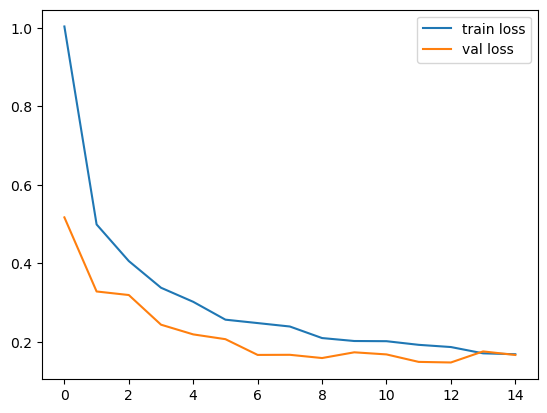

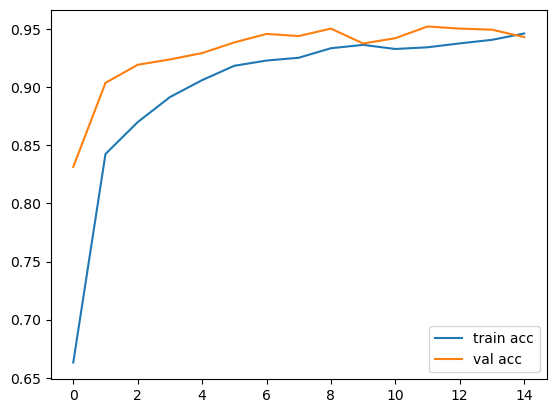

In [ ]:
plot_loss_accuracy(VGGFishModel)

In [ ]:
### Print the model performance

In [ ]:
yp, ytest =generate_predictions(test_data, VGGFishModel)

1/1 [==============================] - 0s 88ms/step


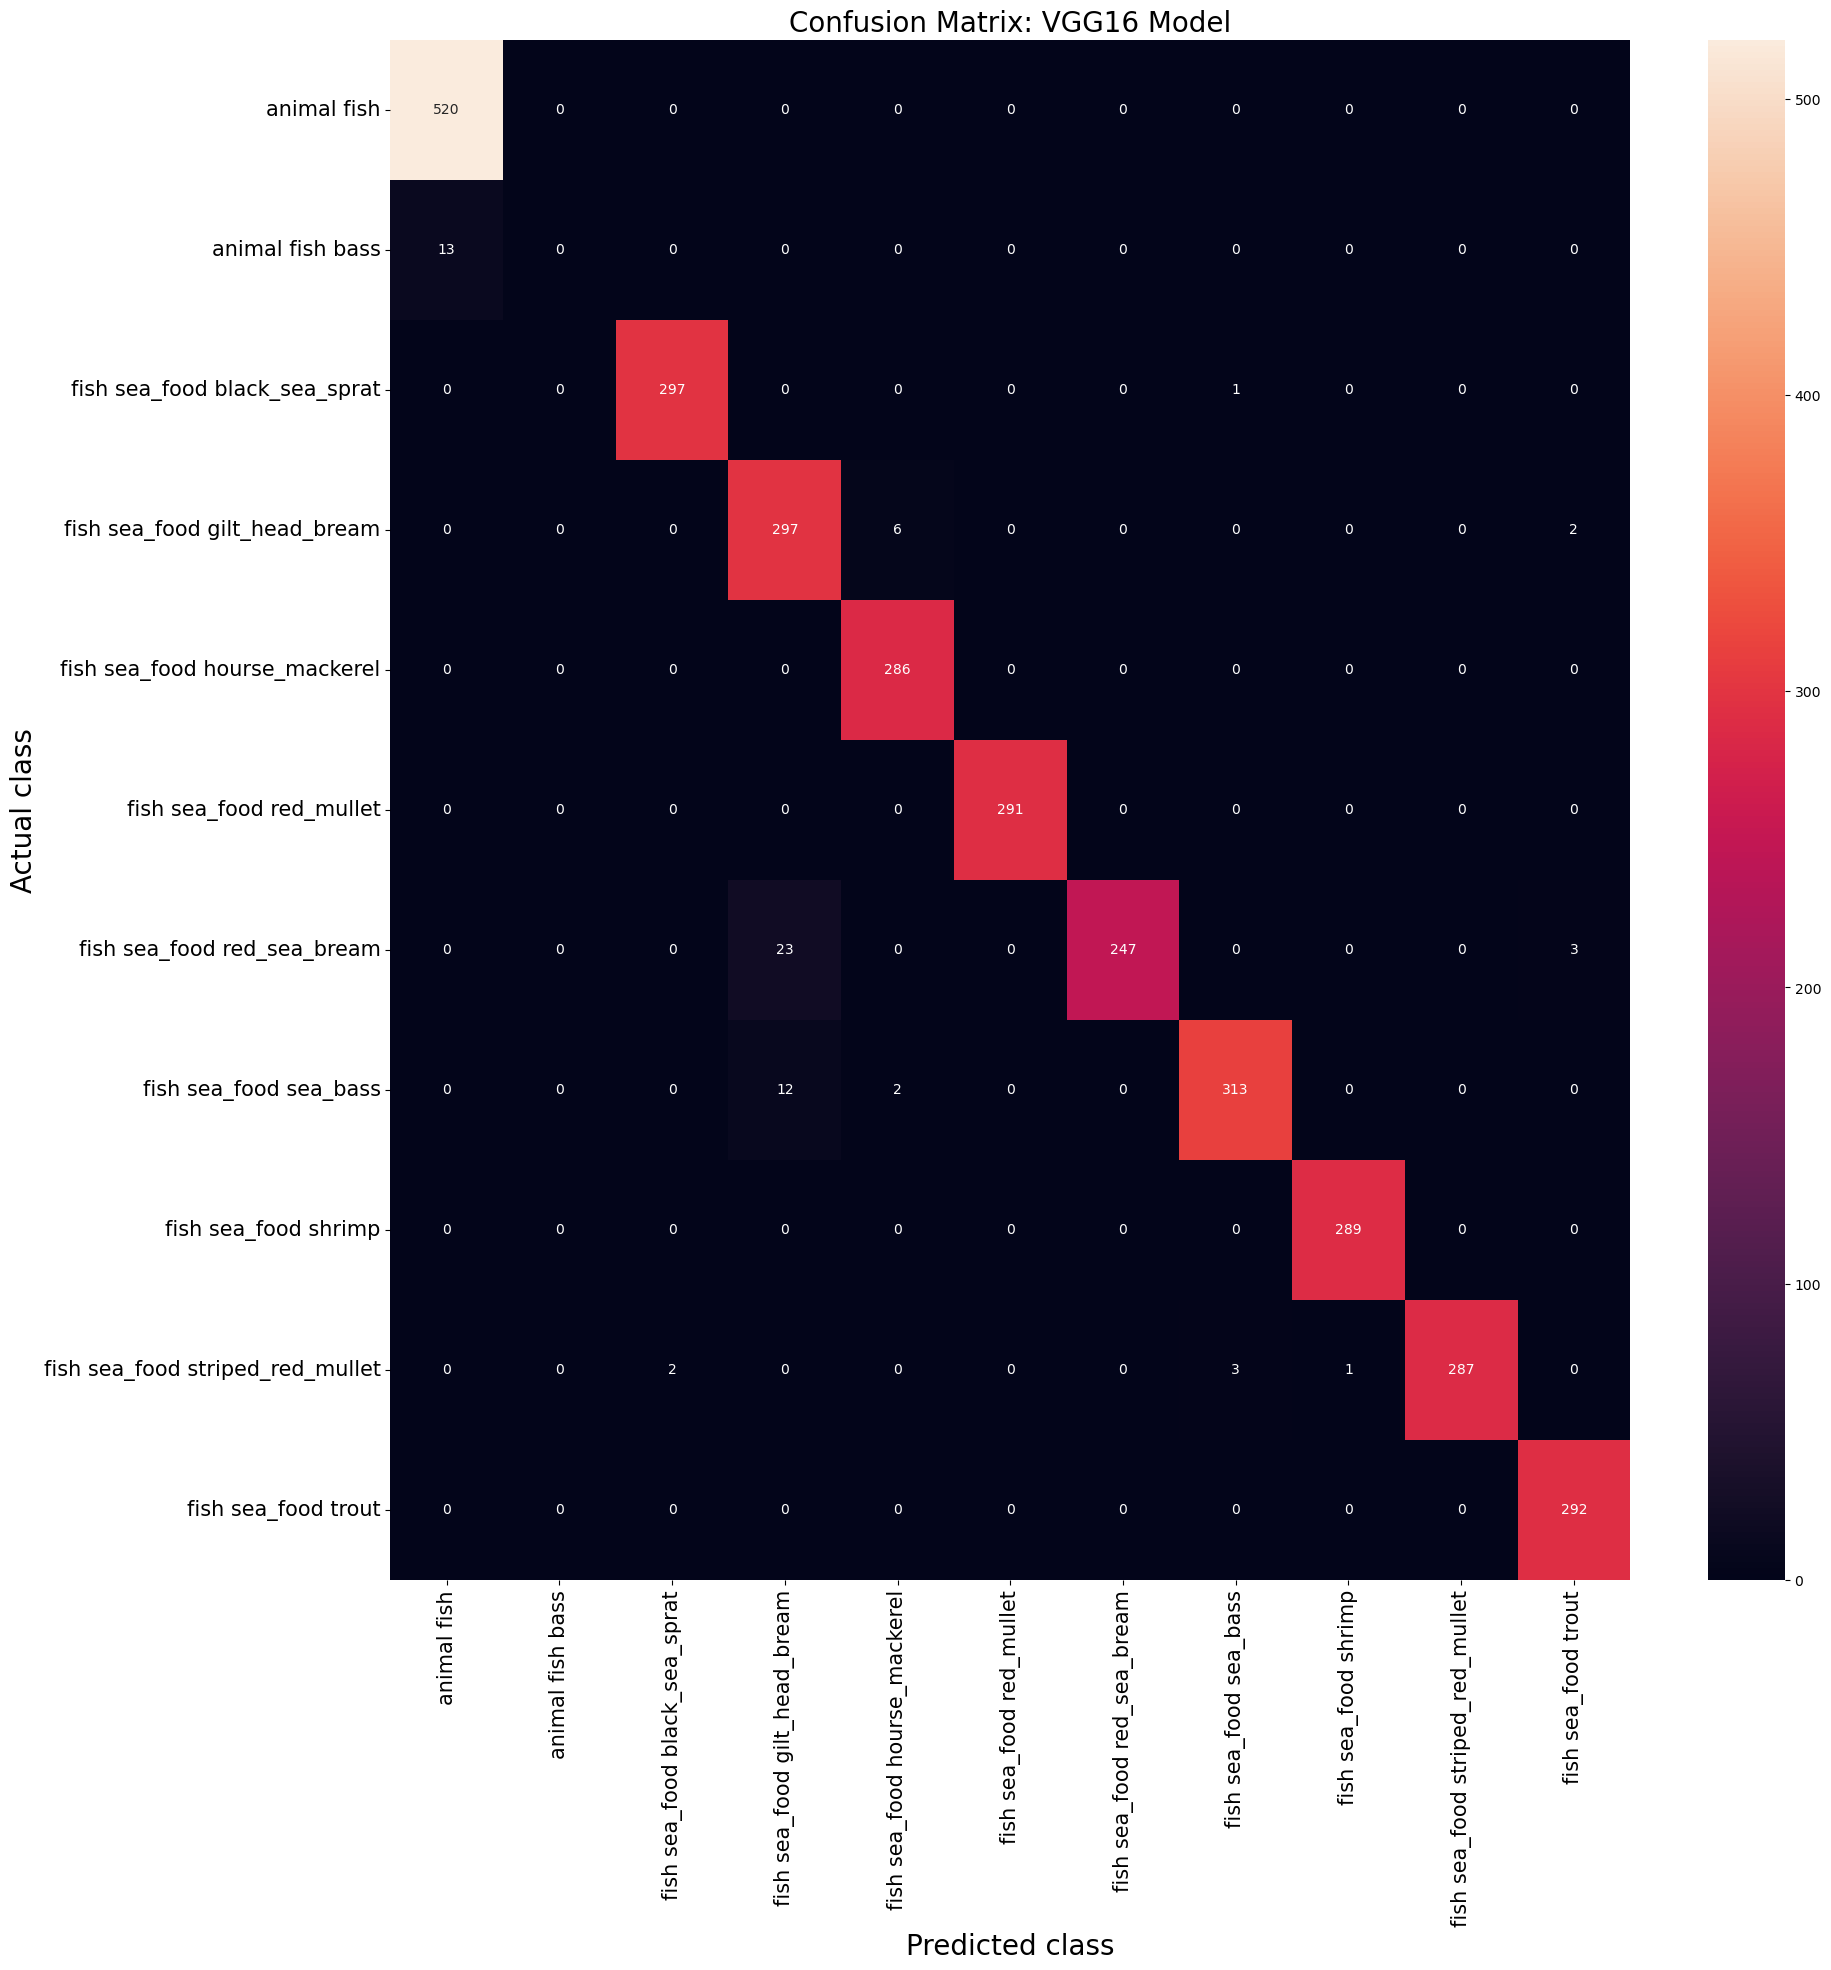

CLASSIFICATION REPORT
.....................
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       520
           1       0.00      0.00      0.00        13
           2       0.99      1.00      0.99       298
           3       0.89      0.97      0.93       305
           4       0.97      1.00      0.99       286
           5       1.00      1.00      1.00       291
           6       1.00      0.90      0.95       273
           7       0.99      0.96      0.97       327
           8       1.00      1.00      1.00       289
           9       1.00      0.98      0.99       293
          10       0.98      1.00      0.99       292

    accuracy                           0.98      3187
   macro avg       0.89      0.89      0.89      3187
weighted avg       0.98      0.98      0.98      3187



C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print_confusion_Matrix(class_labels, ytest, yp, 'VGG16 Model')

### ResNet50

In [ ]:
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
resnet_model = ResNet50(input_shape= IMAGE_SIZE +[3], weights='imagenet', include_top=False)


# Say not to train first layer (ResNet) model as it is already trained
resnet_model.layers[0].trainable = False


In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
x = GlobalAveragePooling2D()(resnet_model.output)
    # Adding fully connected layer
x = Dense(512, activation='relu')(x)
x = Dense(11, activation='softmax', name='fcnew')(x)

resnet50 = Model(inputs=resnet_model.input, outputs=x)

In [ ]:
resnet50.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
resnet50.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']       

 conv2_block3_2_conv (Conv2D)   (None, 32, 32, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 32, 32, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 32, 32, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 32, 32, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 16, 16, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 16, 16, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 16, 16, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block2_2_conv (Conv2D)   (None, 8, 8, 256)    590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 8, 8, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 8, 8, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 8, 8, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block5_2_relu (Activatio  (None, 8, 8, 256)   0           ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 8, 8, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 8, 8, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 8, 8, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
          

 conv5_block2_2_relu (Activatio  (None, 4, 4, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 4, 4, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 4, 4, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 4, 4, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
          

In [ ]:
Res = resnet50.fit_generator(
  train_data,
  validation_data=val_data,
  epochs=10,
  steps_per_epoch=len(train_data),
  validation_steps=len(val_data)
)

C:\Users\Prakash\AppData\Local\Temp\ipykernel_25384\2167664778.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Res = resnet50.fit_generator(


Epoch 1/10
195/195 [==============================] - 656s 3s/step - loss: 0.9405 - accuracy: 0.7100 - val_loss: 13.1529 - val_accuracy: 0.1712
Epoch 2/10
195/195 [==============================] - 624s 3s/step - loss: 0.3278 - accuracy: 0.9014 - val_loss: 22.7697 - val_accuracy: 0.1712
Epoch 3/10
195/195 [==============================] - 713s 4s/step - loss: 0.2101 - accuracy: 0.9354 - val_loss: 20.4751 - val_accuracy: 0.1712
Epoch 4/10
195/195 [==============================] - 697s 4s/step - loss: 0.1617 - accuracy: 0.9555 - val_loss: 7.5465 - val_accuracy: 0.1749
Epoch 5/10
195/195 [==============================] - 659s 3s/step - loss: 0.1855 - accuracy: 0.9471 - val_loss: 1.5394 - val_accuracy: 0.6355
Epoch 6/10
195/195 [==============================] - 664s 3s/step - loss: 0.1382 - accuracy: 0.9571 - val_loss: 0.4875 - val_accuracy: 0.8864
Epoch 7/10
195/195 [==============================] - 705s 4s/step - loss: 0.1118 - accuracy: 0.9663 - val_loss: 1.4243 - val_accuracy: 0.7

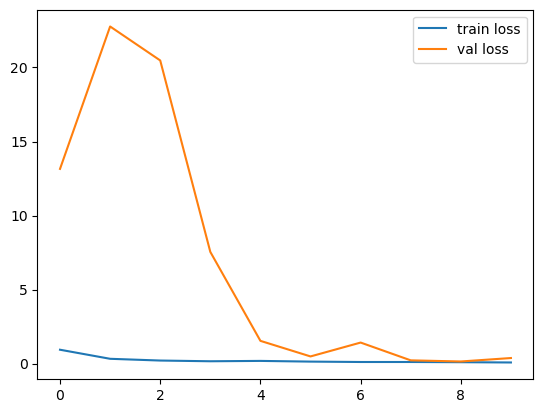

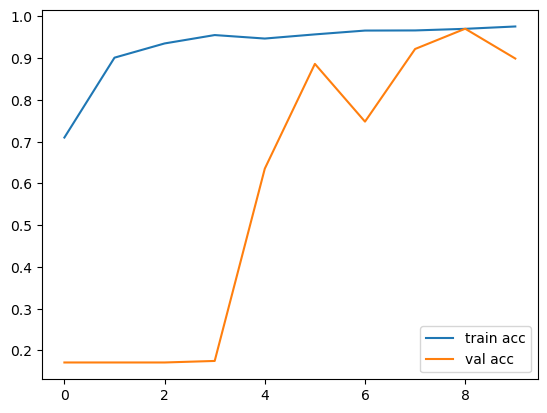

In [ ]:
plot_loss_accuracy(Res)

1/1 [==============================] - 0s 72ms/step


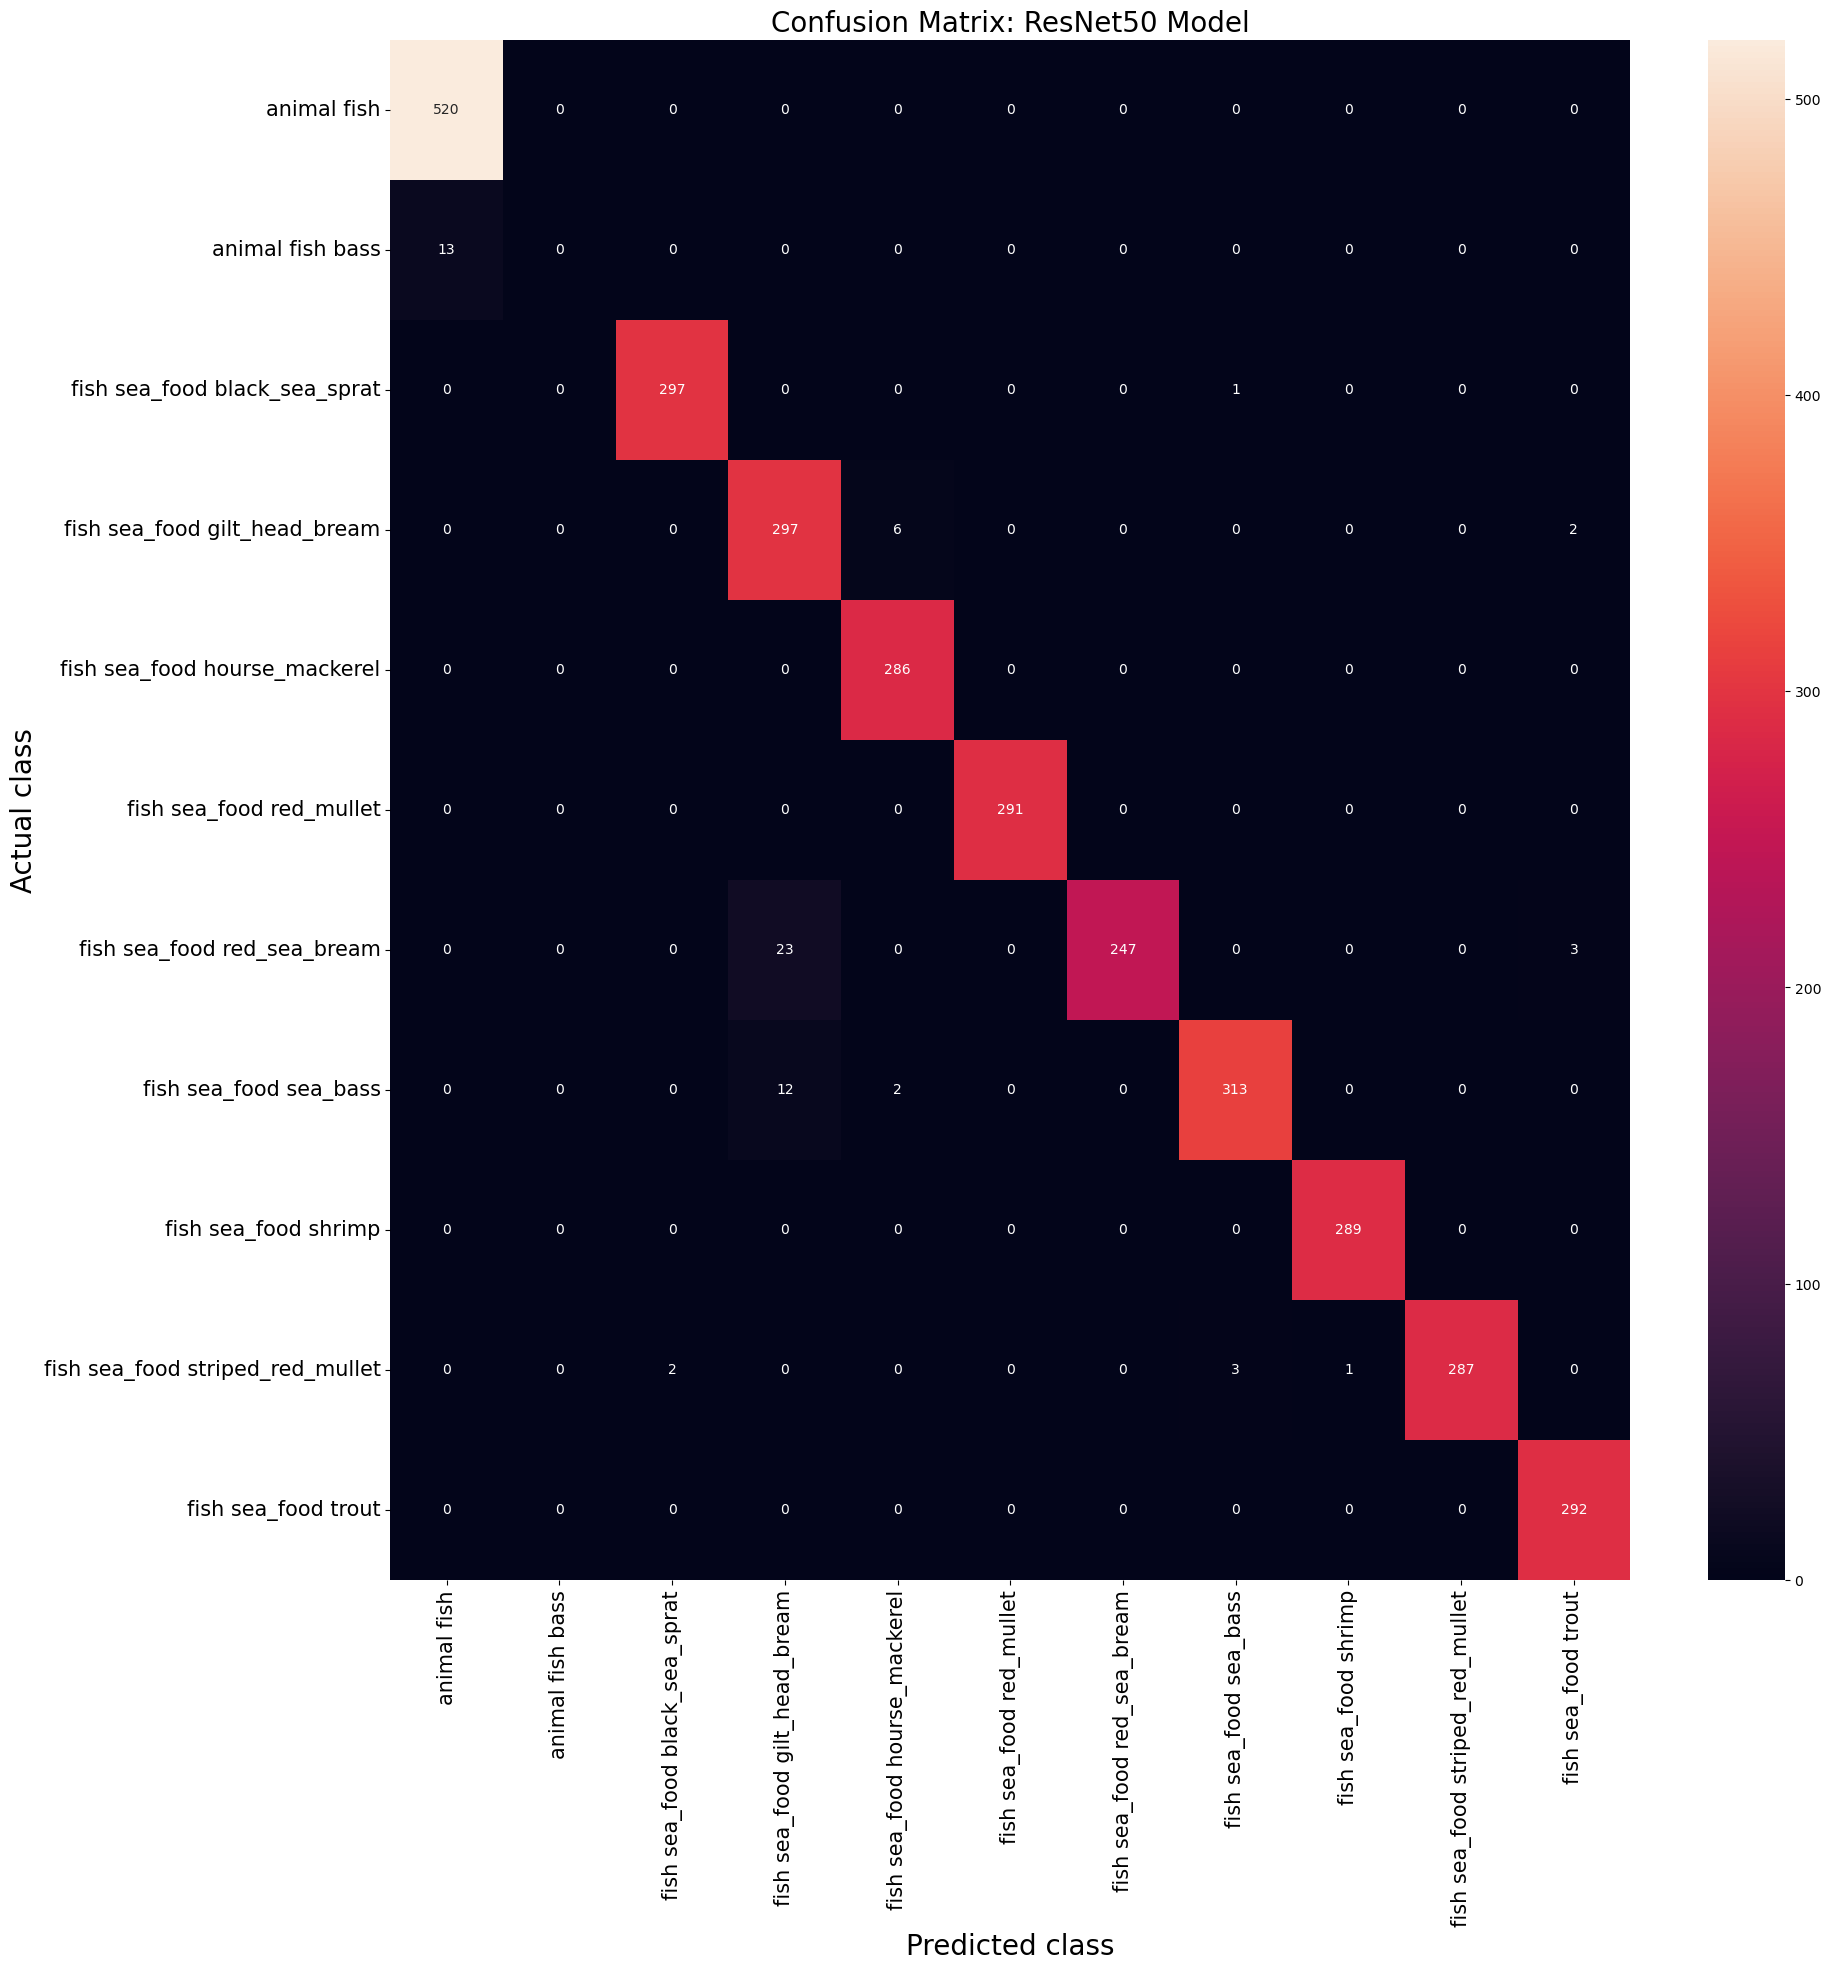

CLASSIFICATION REPORT
.....................
                                  precision    recall  f1-score   support

                     animal fish       0.98      1.00      0.99       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.99      1.00      0.99       298
   fish sea_food gilt_head_bream       0.89      0.97      0.93       305
   fish sea_food hourse_mackerel       0.97      1.00      0.99       286
        fish sea_food red_mullet       1.00      1.00      1.00       291
     fish sea_food red_sea_bream       1.00      0.90      0.95       273
          fish sea_food sea_bass       0.99      0.96      0.97       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       1.00      0.98      0.99       293
             fish sea_food trout       0.98      1.00      0.99       292

                        accuracy                           0.98   

C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
yp, ytest =generate_predictions(test_data, Res)
print_confusion_Matrix(class_labels, ytest, yp, 'ResNet50 Model')


### MobileNet
https://www.tensorflow.org/tutorials/images/transfer_learning

### Transfer Learning using MobileNet model

### Initialize MobileNet model with imagenet weights

In [ ]:
from keras.applications import MobileNetV2

In [ ]:
# add preprocessing layer to the front of VGG
mobilenet = MobileNetV2(input_shape=(128,128,3), weights='imagenet', include_top=False)

# don't train existing weights
for layer in mobilenet.layers:
  layer.trainable = False

In [ ]:
mobilenet.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_5[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 16, 16, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 16, 16, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 16, 16, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 16, 16, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 8, 8, 384)    0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 8, 8, 384)   3456        ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 8, 8, 384)   1536        ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 8, 8, 96)    384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 8, 8, 576)    55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 8, 8, 576)   2304        ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 8, 8, 576)    0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 4, 4, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 4, 4, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 4, 4, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 4, 4, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [ ]:
x = GlobalAveragePooling2D()(mobilenet.output)
    # Adding fully connected layer
x = Dense(512, activation='relu')(x)
x = Dense(11, activation='softmax', name='fcnew')(x)

MobileNetModel = Model(inputs=mobilenet.input, outputs=x)

### Compile Model

In [ ]:
MobileNetModel.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

### Fit the model

In [ ]:
MobileNet_fitted= MobileNetModel.fit_generator(train_data, validation_data=val_data, epochs=15,steps_per_epoch=len(train_data),
  validation_steps=len(val_data))

C:\Users\Prakash\AppData\Local\Temp\ipykernel_25384\982122200.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  MobileNet_fitted= MobileNetModel.fit_generator(train_data, validation_data=val_data, epochs=15,steps_per_epoch=len(train_data),


Epoch 1/15
195/195 [==============================] - 60s 296ms/step - loss: 0.0711 - accuracy: 0.9804 - val_loss: 0.1016 - val_accuracy: 0.9698
Epoch 2/15
195/195 [==============================] - 50s 255ms/step - loss: 0.0649 - accuracy: 0.9765 - val_loss: 0.1336 - val_accuracy: 0.9670
Epoch 3/15
195/195 [==============================] - 50s 258ms/step - loss: 0.0674 - accuracy: 0.9764 - val_loss: 0.0903 - val_accuracy: 0.9744
Epoch 4/15
195/195 [==============================] - 51s 262ms/step - loss: 0.0655 - accuracy: 0.9788 - val_loss: 0.1250 - val_accuracy: 0.9679
Epoch 5/15
195/195 [==============================] - 51s 263ms/step - loss: 0.0568 - accuracy: 0.9817 - val_loss: 0.1165 - val_accuracy: 0.9679
Epoch 6/15
195/195 [==============================] - 53s 272ms/step - loss: 0.0544 - accuracy: 0.9823 - val_loss: 0.1184 - val_accuracy: 0.9670
Epoch 7/15
195/195 [==============================] - 50s 254ms/step - loss: 0.0482 - accuracy: 0.9833 - val_loss: 0.1197 - val_ac

1/1 [==============================] - 0s 78ms/step


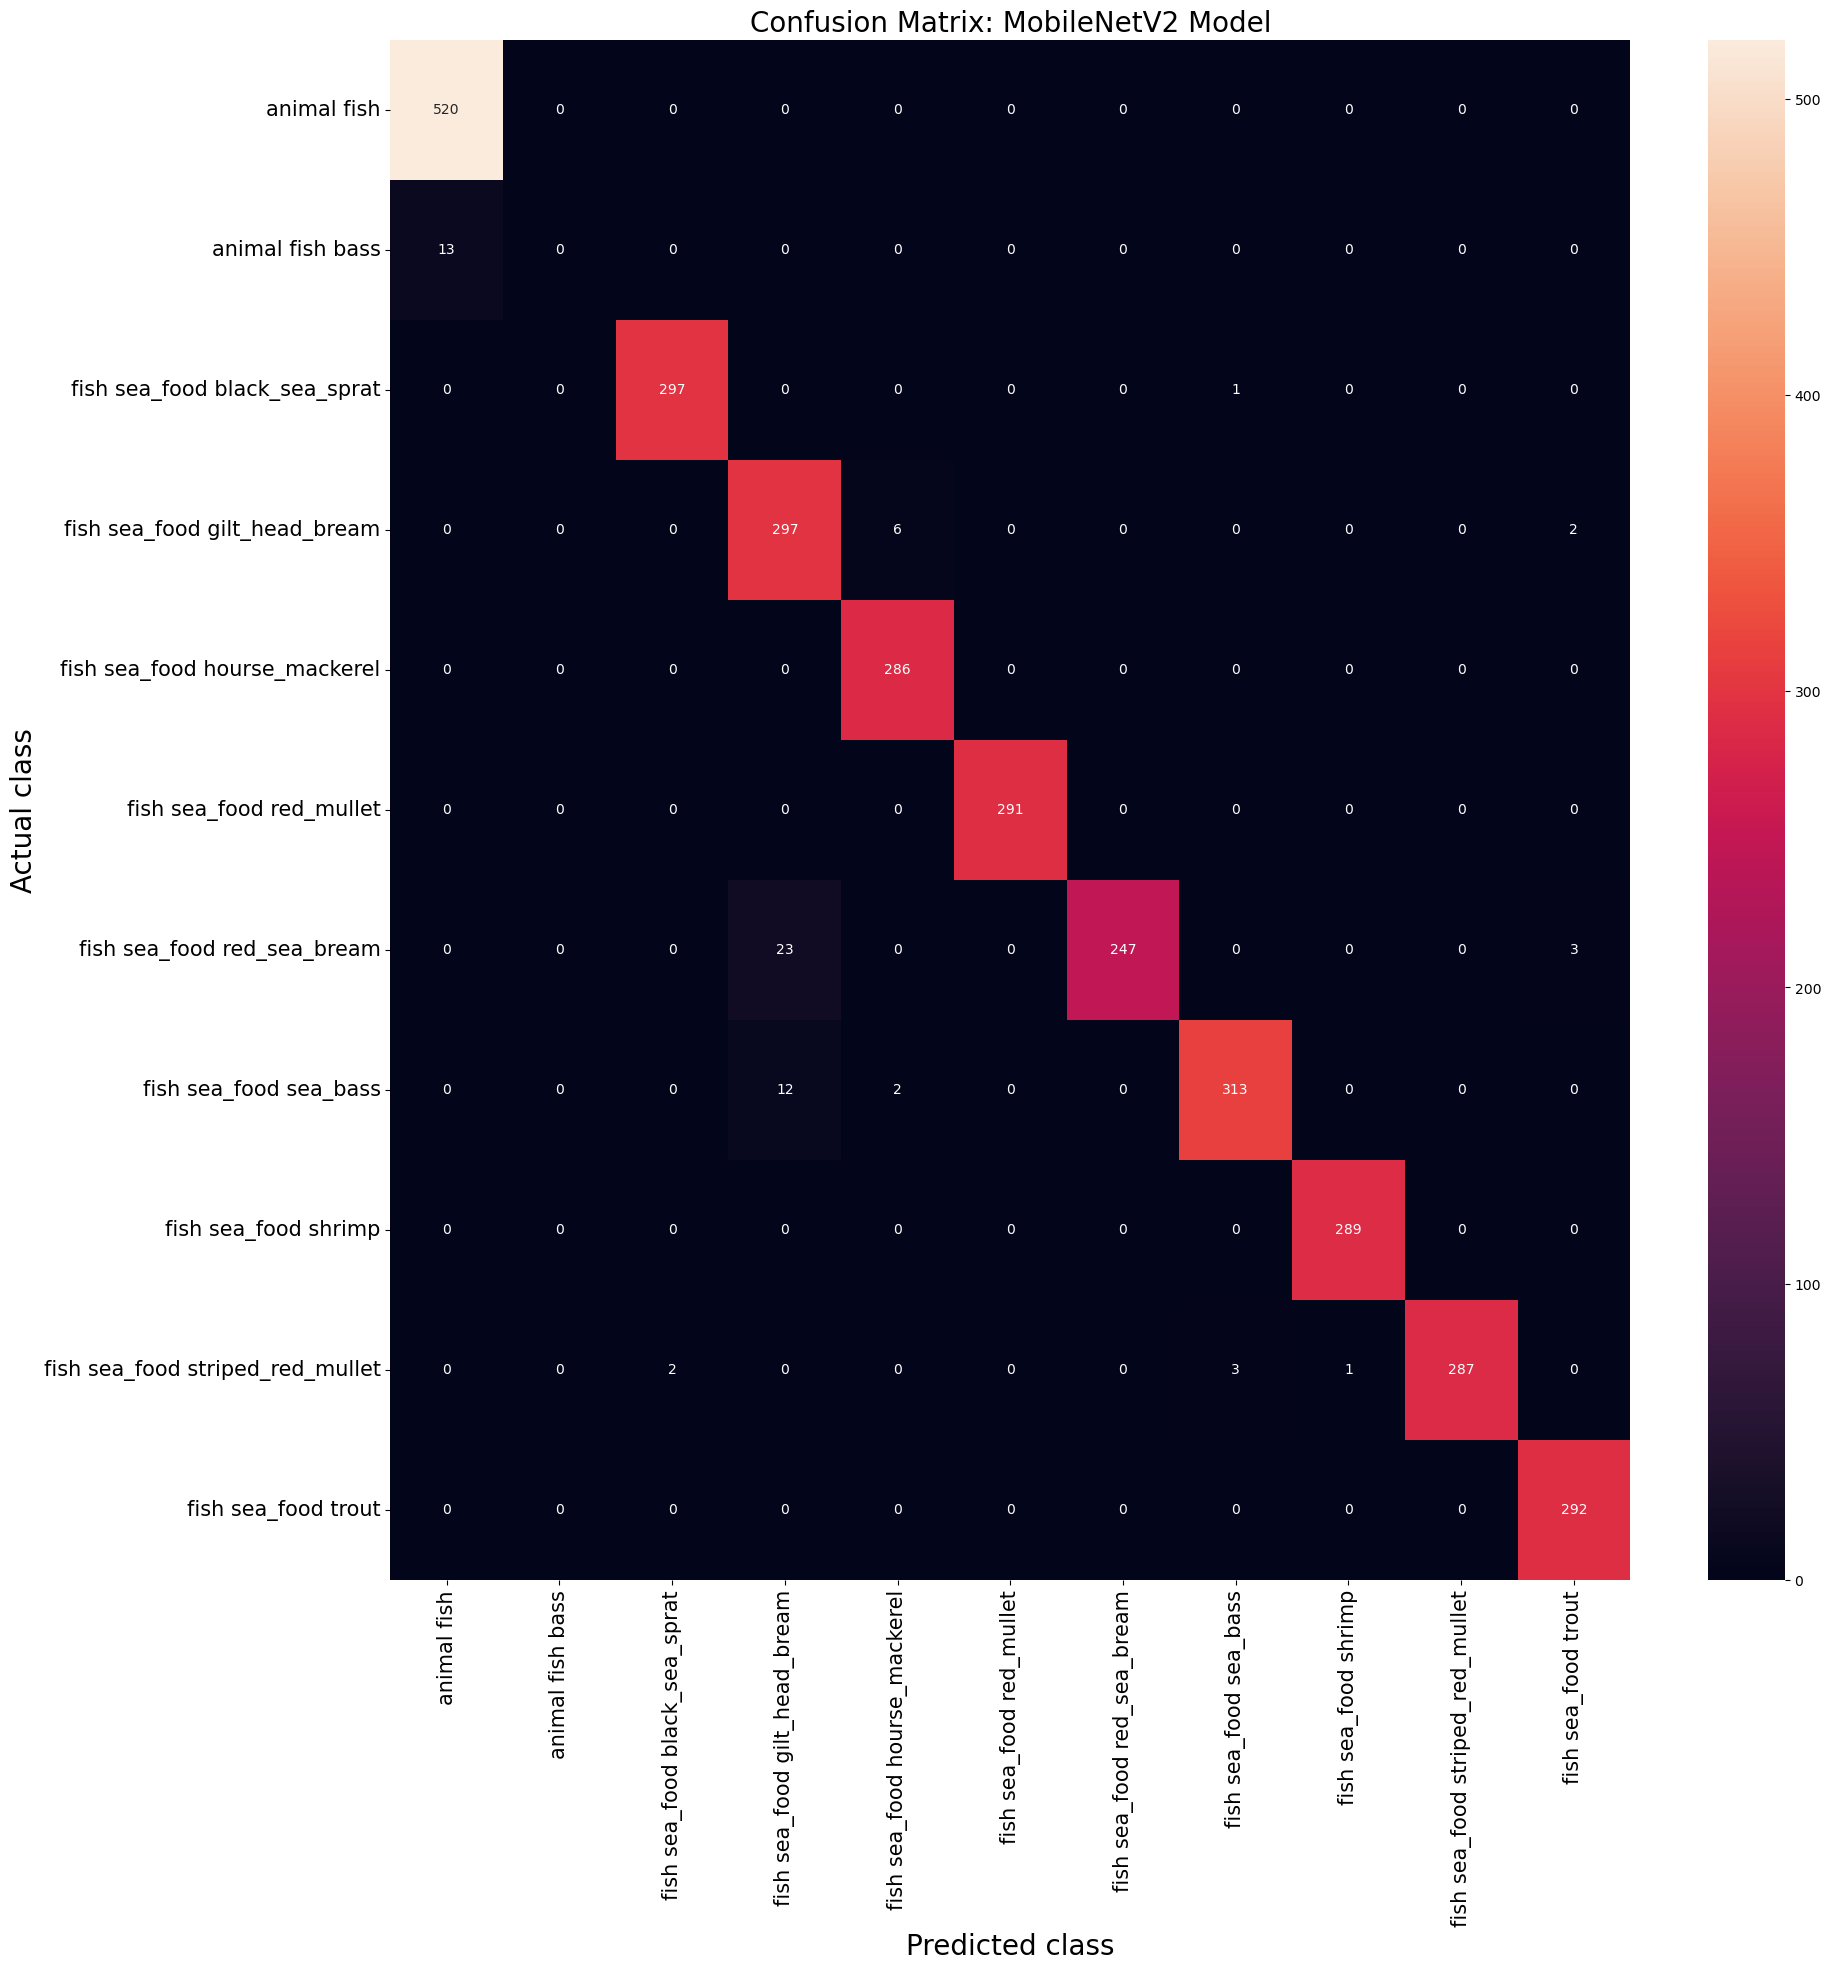

CLASSIFICATION REPORT
.....................
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       520
           1       0.00      0.00      0.00        13
           2       0.99      1.00      0.99       298
           3       0.89      0.97      0.93       305
           4       0.97      1.00      0.99       286
           5       1.00      1.00      1.00       291
           6       1.00      0.90      0.95       273
           7       0.99      0.96      0.97       327
           8       1.00      1.00      1.00       289
           9       1.00      0.98      0.99       293
          10       0.98      1.00      0.99       292

    accuracy                           0.98      3187
   macro avg       0.89      0.89      0.89      3187
weighted avg       0.98      0.98      0.98      3187



C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
yp, ytest =generate_predictions(test_data, MobileNet_fitted)
print_confusion_Matrix(class_labels, ytest, yp, 'MobileNetV2 Model')

### InceptionV3 model

In [ ]:
from keras.applications import InceptionV3
# add preprocessing layer to the front of VGG
inception_base = InceptionV3(input_shape=(128,128,3), weights='imagenet', include_top=False)

# don't train existing weights
for layer in inception_base.layers:
  layer.trainable = False

In [ ]:
inception_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_97 (Conv2D)             (None, 63, 63, 32)   864         ['input_6[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 63, 63, 32)  96          ['conv2d_97[0][0]']              
 ormalization)                                                                                    
                                                                                       

 batch_normalization_104 (Batch  (None, 13, 13, 96)  288         ['conv2d_107[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 13, 13, 32)  96          ['conv2d_108[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_99 (Activation)     (None, 13, 13, 64)   0           ['batch_normalization_99[0][0]'] 
                                                                                                  
 activation_101 (Activation)    (None, 13, 13, 64)   0           ['batch_normalization_101[0][0]']
                                                                                                  
 activatio

 conv2d_117 (Conv2D)            (None, 13, 13, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_120 (Conv2D)            (None, 13, 13, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_normalization_114 (Batch  (None, 13, 13, 48)  144         ['conv2d_117[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_117 (Batch  (None, 13, 13, 96)  288         ['conv2d_120[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

                                                                                                  
 conv2d_131 (Conv2D)            (None, 6, 6, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_128 (Batch  (None, 6, 6, 128)   384         ['conv2d_131[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_128 (Activation)    (None, 6, 6, 128)    0           ['batch_normalization_128[0][0]']
                                                                                                  
 conv2d_132 (Conv2D)            (None, 6, 6, 128)    114688      ['activation_128[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 activation_138 (Activation)    (None, 6, 6, 160)    0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_142 (Conv2D)            (None, 6, 6, 160)    179200      ['activation_138[0][0]']         
                                                                                                  
 batch_normalization_139 (Batch  (None, 6, 6, 160)   480         ['conv2d_142[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_139 (Activation)    (None, 6, 6, 160)    0           ['batch_normalization_139[0][0]']
                                                                                                  
 conv2d_13

 batch_normalization_149 (Batch  (None, 6, 6, 160)   480         ['conv2d_152[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 6, 6, 160)    0           ['batch_normalization_149[0][0]']
                                                                                                  
 conv2d_148 (Conv2D)            (None, 6, 6, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_153 (Conv2D)            (None, 6, 6, 160)    179200      ['activation_149[0][0]']         
                                                                                                  
 batch_normalization_145 (Batch  (None, 6, 6, 160)   480         ['conv2d_148[0][0]']             
 Normaliza

 conv2d_158 (Conv2D)            (None, 6, 6, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_163 (Conv2D)            (None, 6, 6, 192)    258048      ['activation_159[0][0]']         
                                                                                                  
 batch_normalization_155 (Batch  (None, 6, 6, 192)   576         ['conv2d_158[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_160 (Batch  (None, 6, 6, 192)   576         ['conv2d_163[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_168 (Batch  (None, 6, 6, 192)   576         ['conv2d_171[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_164 (Activation)    (None, 6, 6, 192)    0           ['batch_normalization_164[0][0]']
                                                                                                  
 activation_168 (Activation)    (None, 6, 6, 192)    0           ['batch_normalization_168[0][0]']
                                                                                                  
 conv2d_168 (Conv2D)            (None, 2, 2, 320)    552960      ['activation_164[0][0]']         
          

 activation_173 (Activation)    (None, 2, 2, 384)    0           ['batch_normalization_173[0][0]']
                                                                                                  
 activation_176 (Activation)    (None, 2, 2, 384)    0           ['batch_normalization_176[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 2, 2, 384)    0           ['batch_normalization_177[0][0]']
                                                                                                  
 batch_normalization_178 (Batch  (None, 2, 2, 192)   576         ['conv2d_181[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_170 (Activation)    (None, 2, 2, 320)    0           ['batch_normalization_170[0][0]']
          

 batch_normalization_187 (Batch  (None, 2, 2, 192)   576         ['conv2d_190[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_179 (Activation)    (None, 2, 2, 320)    0           ['batch_normalization_179[0][0]']
                                                                                                  
 mixed9_1 (Concatenate)         (None, 2, 2, 768)    0           ['activation_181[0][0]',         
                                                                  'activation_182[0][0]']         
                                                                                                  
 concatenate_3 (Concatenate)    (None, 2, 2, 768)    0           ['activation_185[0][0]',         
                                                                  'activation_186[0][0]']         
          

In [ ]:
x = GlobalAveragePooling2D()(inception_base.output)
    # Adding fully connected layer
x = Dense(512, activation='relu')(x)
x = Dense(11, activation='softmax', name='fcnew')(x)

InceptionV3_model = Model(inputs=inception_base.input, outputs=x)

### Compile InceptionV3 Model

In [ ]:
InceptionV3_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

### Fit InceptionV3 Model

In [ ]:
InceptionV3_fitted = InceptionV3_model.fit_generator(train_data, validation_data=val_data, epochs=15,steps_per_epoch=len(train_data),
  validation_steps=len(val_data))

Epoch 1/15


C:\Users\Prakash\AppData\Local\Temp\ipykernel_25384\2652638778.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  InceptionV3_fitted = InceptionV3_model.fit_generator(train_data, validation_data=val_data, epochs=15,steps_per_epoch=len(train_data),


195/195 [==============================] - 71s 347ms/step - loss: 1.2182 - accuracy: 0.6837 - val_loss: 0.4984 - val_accuracy: 0.8462
Epoch 2/15
195/195 [==============================] - 74s 378ms/step - loss: 0.5408 - accuracy: 0.8133 - val_loss: 0.4131 - val_accuracy: 0.8516
Epoch 3/15
195/195 [==============================] - 72s 371ms/step - loss: 0.5072 - accuracy: 0.8270 - val_loss: 0.3066 - val_accuracy: 0.8965
Epoch 4/15
195/195 [==============================] - 67s 346ms/step - loss: 0.4528 - accuracy: 0.8400 - val_loss: 0.3027 - val_accuracy: 0.8984
Epoch 5/15
195/195 [==============================] - 69s 353ms/step - loss: 0.4279 - accuracy: 0.8525 - val_loss: 0.3951 - val_accuracy: 0.8645
Epoch 6/15
195/195 [==============================] - 70s 359ms/step - loss: 0.4053 - accuracy: 0.8565 - val_loss: 0.3662 - val_accuracy: 0.8874
Epoch 7/15
195/195 [==============================] - 70s 360ms/step - loss: 0.3733 - accuracy: 0.8710 - val_loss: 0.3259 - val_accuracy: 0.8

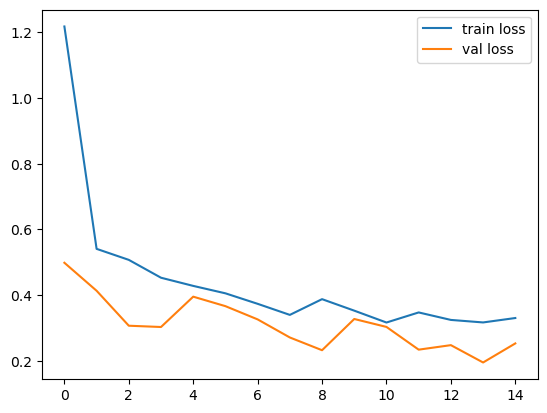

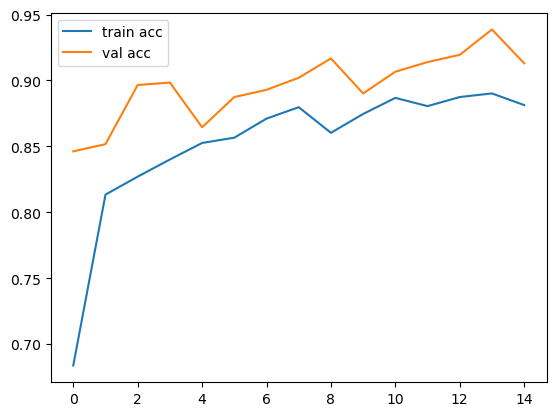

In [ ]:
plot_loss_accuracy(InceptionV3_fitted)


1/1 [==============================] - 0s 65ms/step


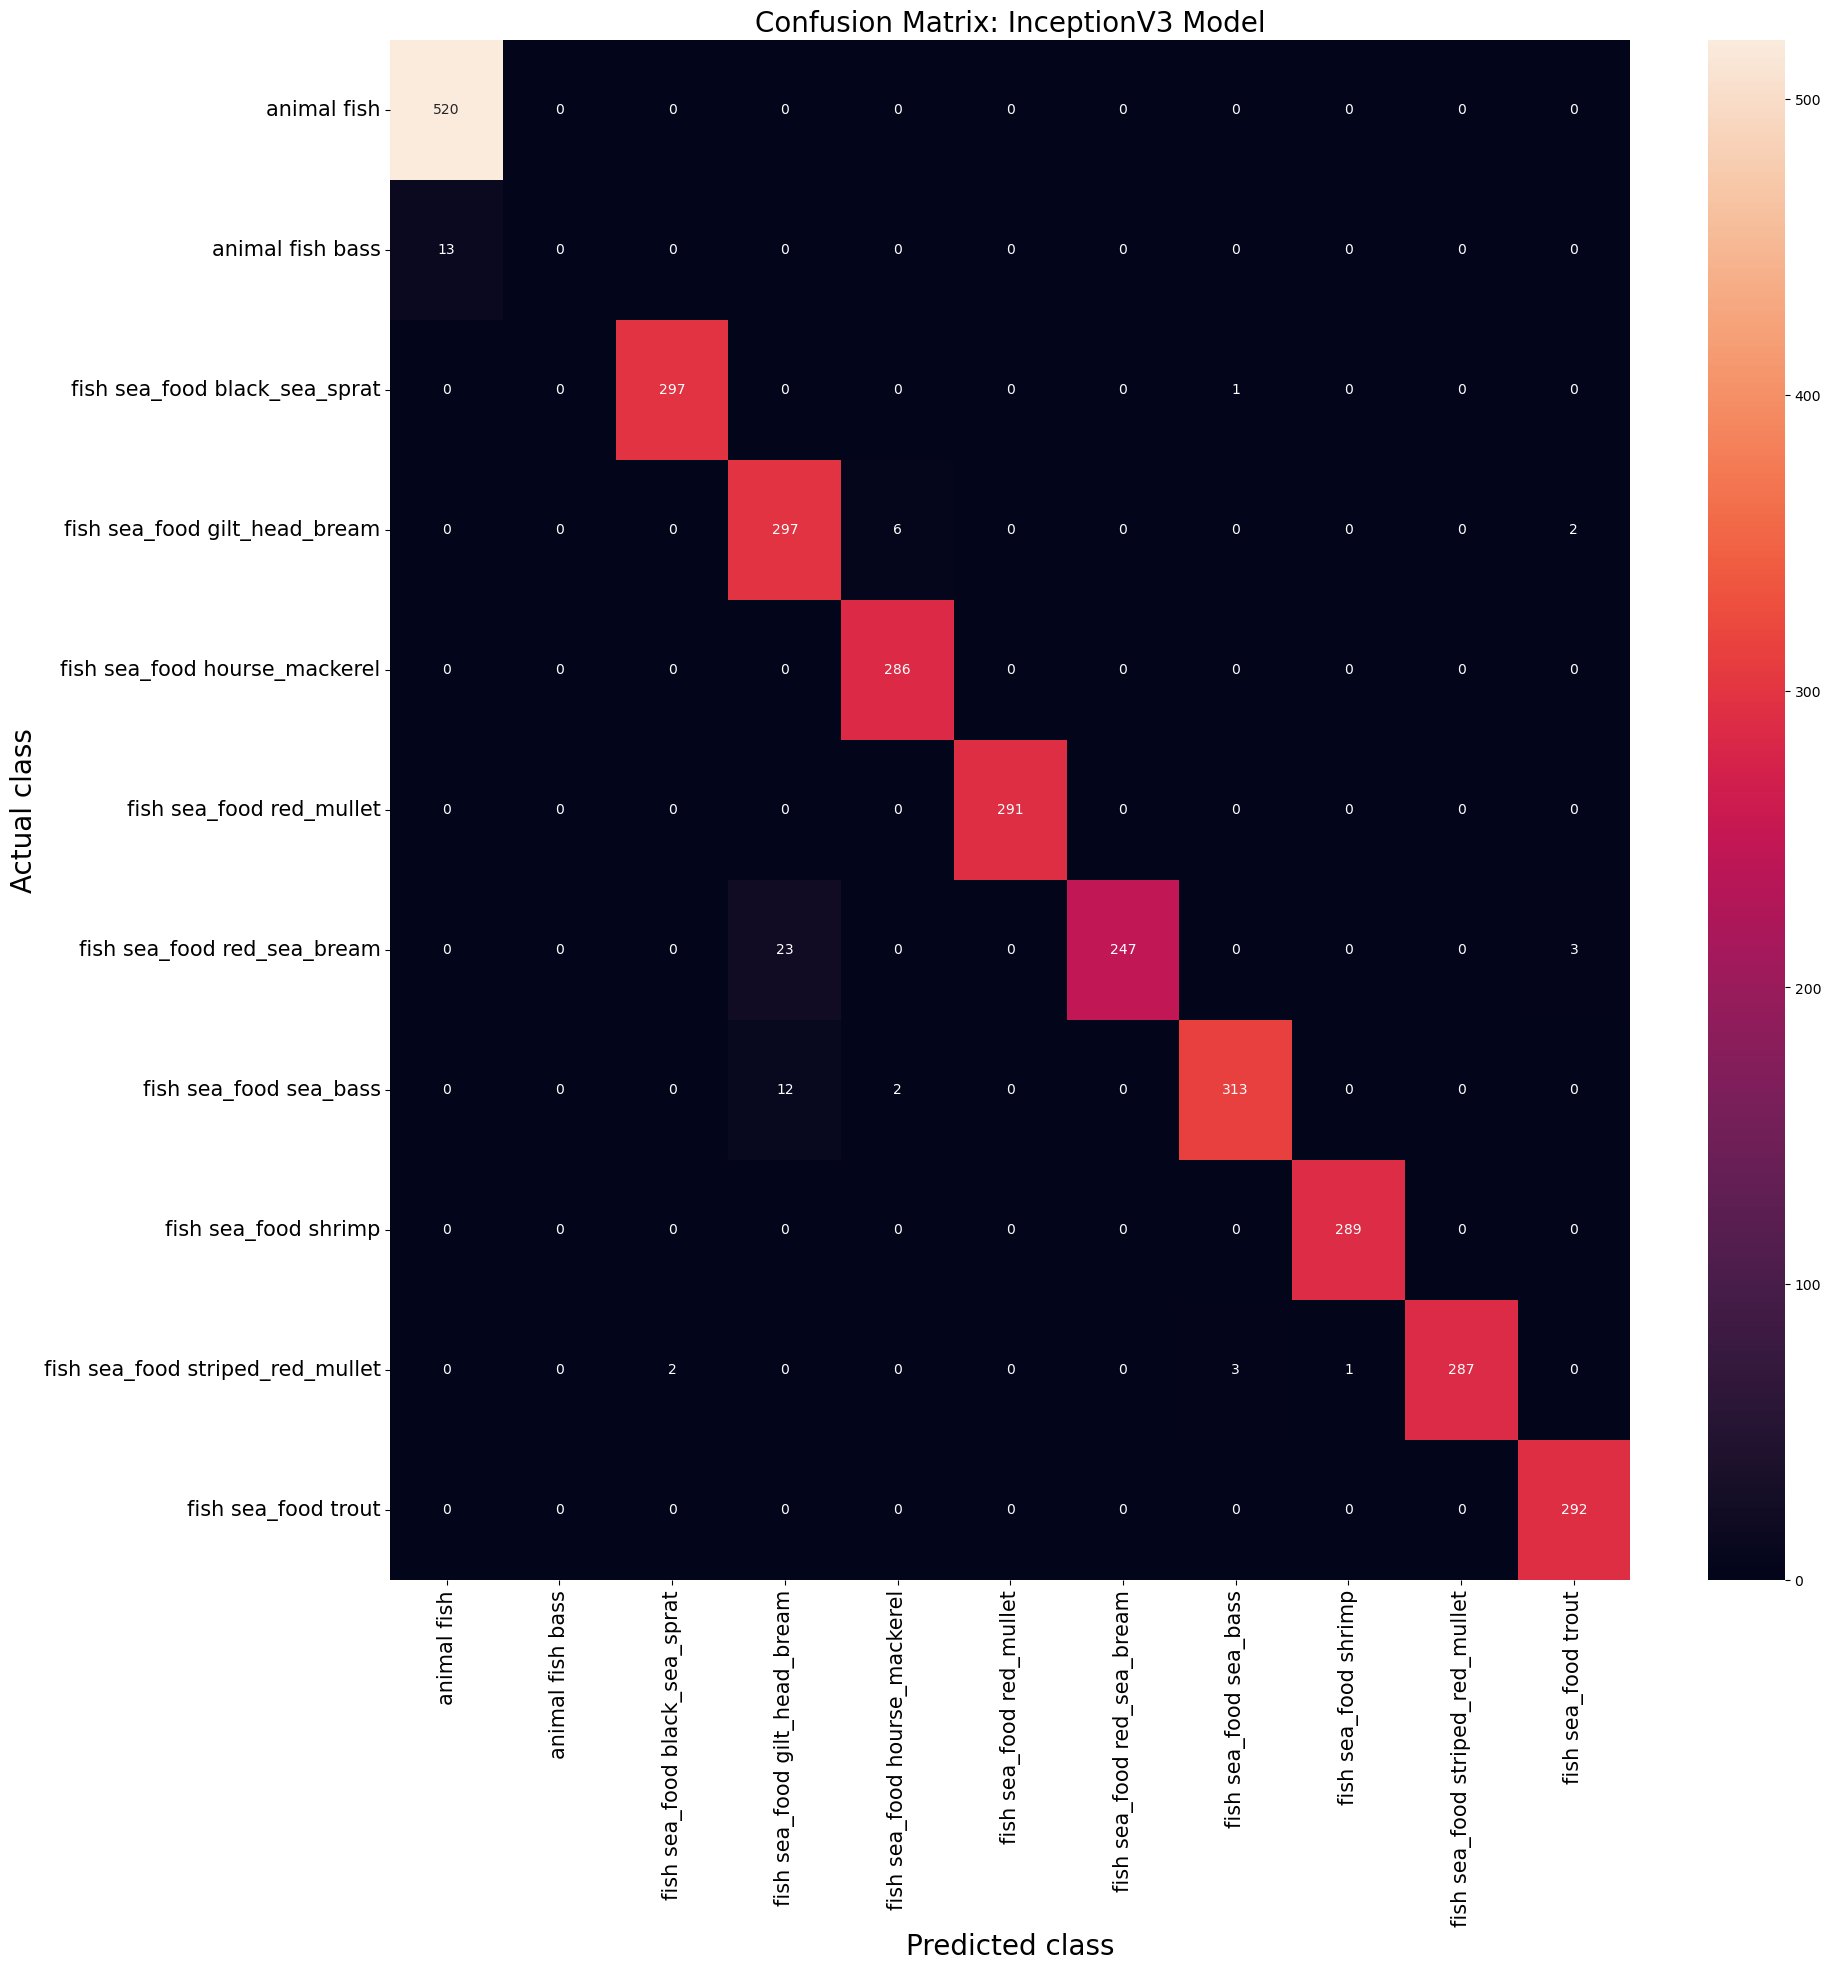

CLASSIFICATION REPORT
.....................
                                  precision    recall  f1-score   support

                     animal fish       0.98      1.00      0.99       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.99      1.00      0.99       298
   fish sea_food gilt_head_bream       0.89      0.97      0.93       305
   fish sea_food hourse_mackerel       0.97      1.00      0.99       286
        fish sea_food red_mullet       1.00      1.00      1.00       291
     fish sea_food red_sea_bream       1.00      0.90      0.95       273
          fish sea_food sea_bass       0.99      0.96      0.97       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       1.00      0.98      0.99       293
             fish sea_food trout       0.98      1.00      0.99       292

                        accuracy                           0.98   

C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
yp, ytest =generate_predictions(test_data, InceptionV3_fitted)
print_confusion_Matrix(class_labels, ytest, yp, 'InceptionV3 Model')

### EfficientNetB0

In [ ]:
from keras.applications import EfficientNetB0

In [ ]:
effnet_base= EfficientNetB0(input_shape=(128,128,3), weights='imagenet', include_top=False)

In [ ]:
effnet_base.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 128, 128, 3)  0           ['input_7[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 128, 128, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 128, 128, 3)  0           ['normalization[0][0

 block2b_expand_conv (Conv2D)   (None, 32, 32, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 32, 32, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_expand_activation (Act  (None, 32, 32, 144)  0          ['block2b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2b_dwconv (DepthwiseConv2  (None, 32, 32, 144)  1296       ['block2b_expand_activation[0][0]
 D)                                                              ']                               
          

                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 16, 16, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 16, 16, 240)  960        ['block3b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3b_activation (Activation  (None, 16, 16, 240)  0          ['block3b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3b_s

 block4b_activation (Activation  (None, 8, 8, 480)   0           ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block4b_se_squeeze[0][0]']     
                                                                                                  
 block4b_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block4b_se_reshape[0][0]']     
                                                                                                  
 block4b_s

                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_se_excite (Multiply)   (None, 8, 8, 480)    0           ['block5a_activation[0][0]',     
                                                                  'block5a_se_expand[0][0]']      
                                                                                                  
 block5a_p

 block5c_project_conv (Conv2D)  (None, 8, 8, 112)    75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 8, 8, 112)   448         ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_drop (Dropout)         (None, 8, 8, 112)    0           ['block5c_project_bn[0][0]']     
                                                                                                  
 block5c_add (Add)              (None, 8, 8, 112)    0           ['block5c_drop[0][0]',           
                                                                  'block5b_add[0][0]']            
                                                                                                  
 block6a_e

 block6b_add (Add)              (None, 4, 4, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 4, 4, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 4, 4, 1152)  4608        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6c_expand_activation (Act  (None, 4, 4, 1152)  0           ['block6c_expand_bn[0][0]']      
 ivation)                                                                                         
          

 block7a_expand_bn (BatchNormal  (None, 4, 4, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 4, 4, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 4, 4, 1152)  10368       ['block7a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block7a_bn (BatchNormalization  (None, 4, 4, 1152)  4608        ['block7a_dwconv[0][0]']         
 )        

In [ ]:
x = GlobalAveragePooling2D()(effnet_base.output)
    # Adding fully connected layer
x = Dense(512, activation='relu')(x)
x = Dense(11, activation='softmax', name='fcnew')(x)

efficient_model = Model(inputs=effnet_base.input, outputs=x)

### Compile EfficinetNetB0 model

In [ ]:
efficient_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

### Fit EfficientNetB0 model

In [ ]:
EfficientNetb0_fitted = efficient_model.fit_generator(train_data, validation_data=val_data, epochs=15,steps_per_epoch=len(train_data),
  validation_steps=len(val_data))

Epoch 1/15


C:\Users\Prakash\AppData\Local\Temp\ipykernel_25384\3407317126.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  EfficientNetb0_fitted = efficient_model.fit_generator(train_data, validation_data=val_data, epochs=15,steps_per_epoch=len(train_data),


195/195 [==============================] - 330s 2s/step - loss: 0.4464 - accuracy: 0.8573 - val_loss: 16.2732 - val_accuracy: 0.1712
Epoch 2/15
195/195 [==============================] - 343s 2s/step - loss: 0.1533 - accuracy: 0.9563 - val_loss: 4.3122 - val_accuracy: 0.1712
Epoch 3/15
195/195 [==============================] - 363s 2s/step - loss: 0.0880 - accuracy: 0.9716 - val_loss: 20.7227 - val_accuracy: 0.1712
Epoch 4/15
195/195 [==============================] - 353s 2s/step - loss: 0.0981 - accuracy: 0.9711 - val_loss: 31.4084 - val_accuracy: 0.1712
Epoch 5/15
195/195 [==============================] - 311s 2s/step - loss: 0.0761 - accuracy: 0.9757 - val_loss: 12.8541 - val_accuracy: 0.1548
Epoch 6/15
195/195 [==============================] - 308s 2s/step - loss: 0.0584 - accuracy: 0.9830 - val_loss: 18.3475 - val_accuracy: 0.1712
Epoch 7/15
195/195 [==============================] - 312s 2s/step - loss: 0.0535 - accuracy: 0.9843 - val_loss: 9.0946 - val_accuracy: 0.1712
Epoch

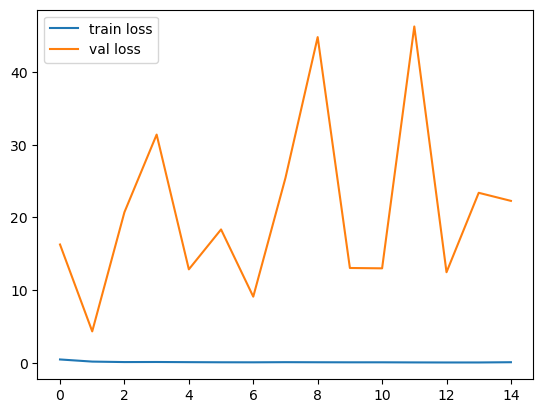

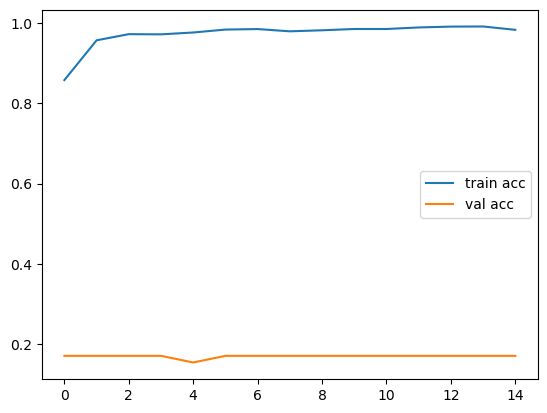

In [ ]:
plot_loss_accuracy(EfficientNetb0_fitted)

1/1 [==============================] - 0s 59ms/step


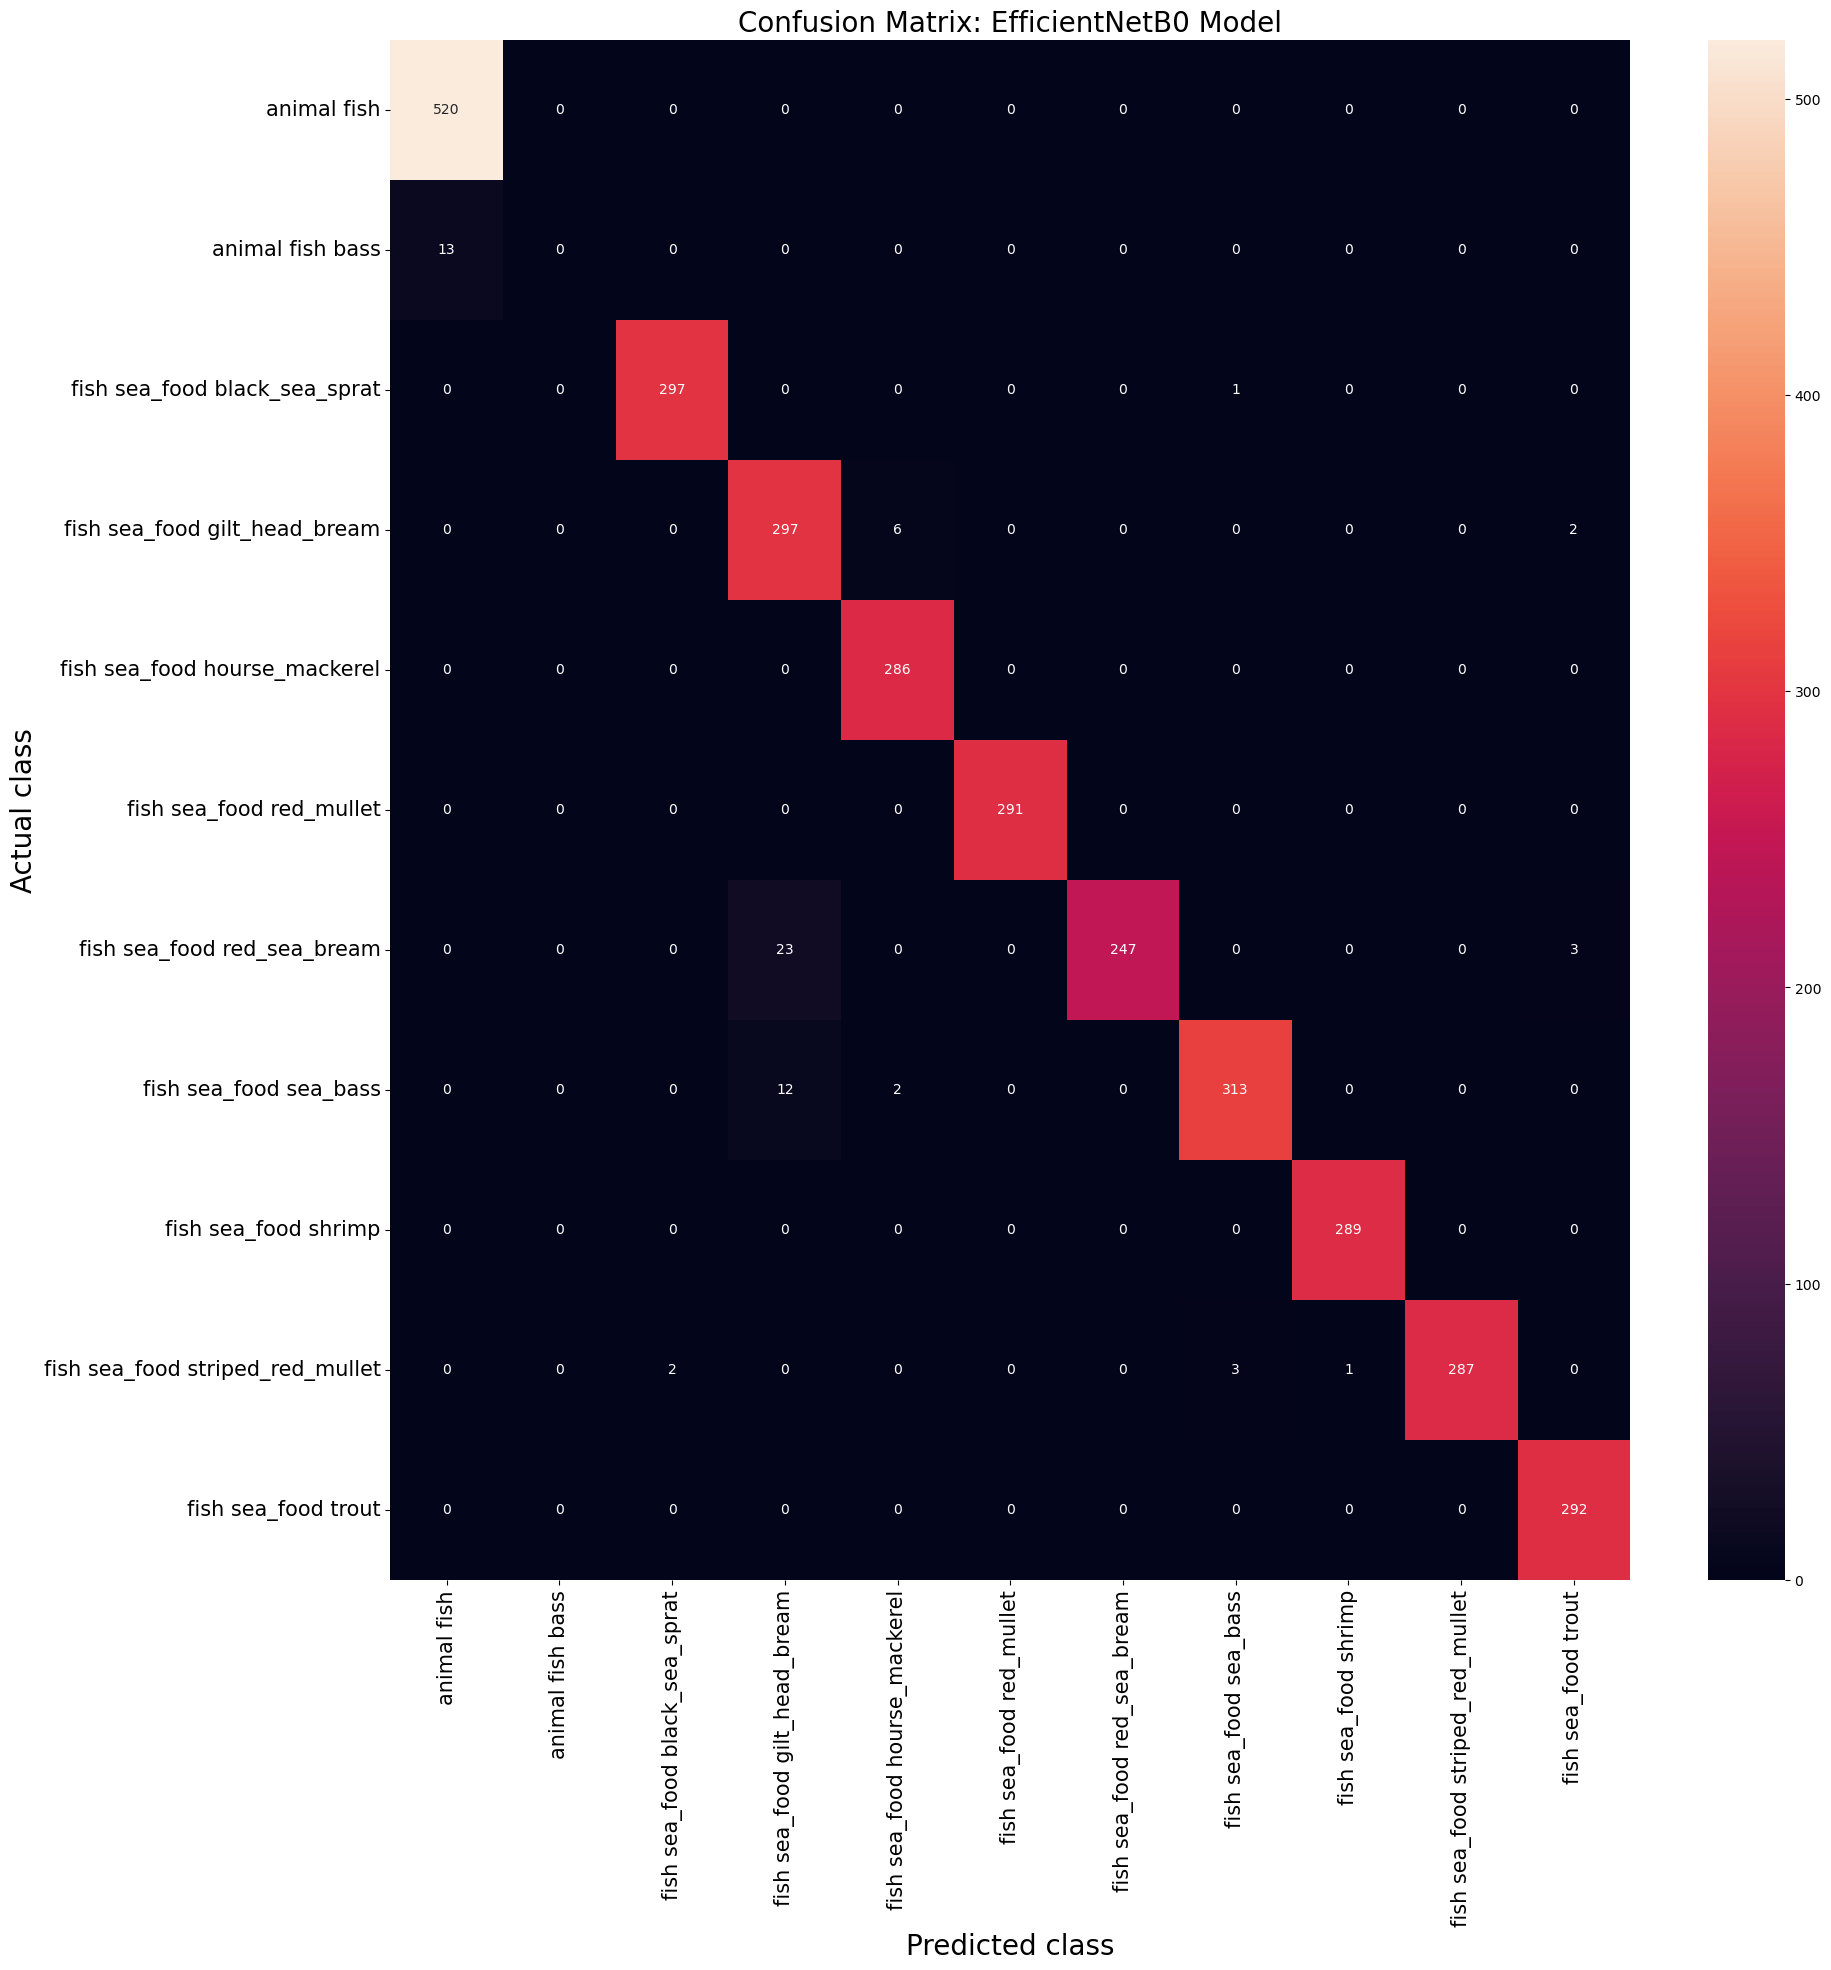

CLASSIFICATION REPORT
.....................
                                  precision    recall  f1-score   support

                     animal fish       0.98      1.00      0.99       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.99      1.00      0.99       298
   fish sea_food gilt_head_bream       0.89      0.97      0.93       305
   fish sea_food hourse_mackerel       0.97      1.00      0.99       286
        fish sea_food red_mullet       1.00      1.00      1.00       291
     fish sea_food red_sea_bream       1.00      0.90      0.95       273
          fish sea_food sea_bass       0.99      0.96      0.97       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       1.00      0.98      0.99       293
             fish sea_food trout       0.98      1.00      0.99       292

                        accuracy                           0.98   

C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
yp, ytest =generate_predictions(test_data, EfficientNetb0_fitted)
print_confusion_Matrix(class_labels, ytest, yp, 'EfficientNetB0 Model')

### Saving best model

* We notice our base model and the models learning VGG16, InceptionV3, MobileNet with transfer learning are giving similar performance

* Considering the loss and accuracy curves smoothness of convergance, we use VGG16 as best model

### Load the image for which prediction to be made

In [ ]:
img_path='FishDataset/test/fish sea_food red_mullet/2S8JUO80K7YB.jpg'


def predict(path, dl_model):
    """
    The function takes the new example image path and the model to make prediction.
    The method returns predicted class label.
    
    """
    img=load_img(path,target_size=(128,128,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=dl_model.predict(img)
    print(answer)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = class_name[y]
    return res








### Define a function to make prediction on new image using saved model

In [ ]:

def make_prediction(path, class_names, dl_model):
    """


    """
    from keras_preprocessing.image import load_img, img_to_array
    img=load_img(path,target_size=(128, 128,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=dl_model.predict(img)
    print(answer)
    y_class = answer.argmax(axis=-1)

    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = class_names[y]
    print("Acctual image is:")
    pic=load_img(path,target_size=(128,128,3))
    plt.imshow(pic)

    return "predicted class: " + res

### Load the saved model (.h5)

1/1 [==============================] - 0s 299ms/step
[[7.7566580e-07 2.1964626e-09 4.5979832e-04 1.5178337e-05 3.6233809e-04
  9.9147707e-01 1.6654386e-04 6.1623708e-05 4.0802860e-07 7.3607694e-03
  9.5391064e-05]]
Acctual image is:


'predicted class: fish sea_food red_mullet'

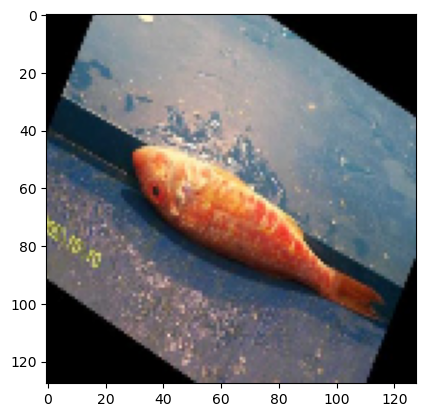

In [ ]:


from keras.models import load_model
model_name = 'FishClassifier_VGG16.h5'
vgg16.save(model_name, save_format='h5')
vgg16.save_weights('model_weights_VGG16.h5')

vgg_saved_model = load_model('./FishClassifier_VGG16.h5')
make_prediction(img_path, class_labels, vgg_saved_model)

In [ ]:
import streamlit as st
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image

# Define fish class labels
fish_classes = [
    "animal fish",
    "animal fish bass",
    "fish sea_food black_sea_sprat",
    "fish sea_food gilt_head_bream",
    "fish sea_food hourse_mackerel",
    "fish sea_food red_mullet",
    "fish sea_food red_sea_bream",
    "fish sea_food sea_bass",
    "fish sea_food shrimp",
    "fish sea_food striped_red_mullet",
    "fish sea_food trout"
]

# Load the VGG16 model
@st.cache_resource
def load_vgg16_model():
    model = load_model("/content/tl_model_v1.weights.best.h5")  # Ensure model is in the correct path
    return model

model = load_vgg16_model()

# Image preprocessing function
def preprocess_input_image(img):
    img = img.convert("RGB")  # Ensure image has 3 channels (RGB)
    img = img.resize((128, 128))  # Resize to match model input size
    img_array = np.array(img) / 255.0  # Normalize pixel values to [0,1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Streamlit UI
st.title("🐟 VGG16 Fish Classification")
st.write("Upload an image to classify the fish species using the VGG16 model.")

# Upload Image
uploaded_file = st.file_uploader("📂 Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Display uploaded image
    image = Image.open(uploaded_file)
    st.image(image, caption="📷 Uploaded Image", use_column_width=True)

    # Preprocess the image
    img_array = preprocess_input_image(image)

    # Make predictions
    predictions = model.predict(img_array)

    # Get the class with the highest probability
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_label = fish_classes[predicted_class_index]
    confidence_score = predictions[0][predicted_class_index] * 100  # Convert to percentage

    # Display the predicted fish species
    st.write(f"###Predicted Fish Species: **{predicted_label}**")
    st.write(f"**Confidence Score:** {confidence_score:.2f}%")

    # Show confidence scores for all classes
    st.subheader("Prediction Confidence for All Classes:")
    for fish, prob in zip(fish_classes, predictions[0]):
        st.write(f"{fish}: **{prob * 100:.2f}%**")  # Confidence in percentage


In [1]:
! pip install streamlit -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [4]:
!wget -q -O - ipv4.icanhazip.com

34.125.20.228


In [6]:
! streamlit run fishapp.py & npx localtunnel --port 8501



⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.20.228:8501

⠴⠦your url is: https://rich-emus-peel.loca.lt
2025-03-10 04:53:26.812212: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741582406.841996   13967 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741582406.851007   13967 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-10 04:53:26.881446: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following 